In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [172]:
n_points = 20
data = np.random.rand(n_points, 2)

# Assign labels based on the rule: x1 > x2 -> positive class (+1), else negative class (-1)
labels = np.where(data[:, 0] > data[:, 1], 1, -1)

# Combine features and labels for easier inspection
dataset = np.column_stack((data, labels))

x = data
y = labels.reshape(1,-1)
out = 1
n,m  = x.shape

w = np.random.rand(out, m) * 0.01

In [174]:
def f(x, w):
    return np.dot(w, x.T)

def tanh(x):
    p_exp = np.exp(x)
    n_exp = np.exp(-x)
    return (p_exp - n_exp) / (p_exp + n_exp)

def tanh_derivative(x):
    return 1 - (tanh(x)**2)

z1 = f(x, w)
a1 = tanh(z1)

loss = np.sum((y-a1)**2) / len(y)

print(f"z1 shape {z1.shape}")
print(f"a1 shape {a1.shape}")
print(f"y shape {y.shape}")

z1 shape (1, 20)
a1 shape (1, 20)
y shape (1, 20)


In [176]:
def backward(x, y, w, z1, a1):
    dL_da1 = - (y-a1)
    da1_dz1 = tanh_derivative(z1)
    dz1_dw1 = x
    
    delta_L = dL_da1 * da1_dz1
    dL_dw1 = np.dot(delta_L , dz1_dw1)
    return dL_dw1

dL_dw1 = backward(x, y, w, z1, a1) 

In [178]:
r = 0.01
epochs = 10000
losses = []
W = []
for epoch in range(epochs):
    
    z1 = f(x, w)
    a1 = tanh(z1)
    
    loss = np.sum((y-a1)**2) / len(y)
    losses.append(loss)

    dL_dw1 = backward(x, y, w, z1, a1)
    w -= r * dL_dw1
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} : Loss {loss}")
    W.append(w)


Epoch 0 : Loss 19.90368634693204
Epoch 1000 : Loss 2.17028022445112
Epoch 2000 : Loss 1.4900991041516378
Epoch 3000 : Loss 1.1926966421143657
Epoch 4000 : Loss 1.0163454172606263
Epoch 5000 : Loss 0.8959597585585208
Epoch 6000 : Loss 0.8068007981926719
Epoch 7000 : Loss 0.7371797504336524
Epoch 8000 : Loss 0.6807666299053348
Epoch 9000 : Loss 0.6337942713335394


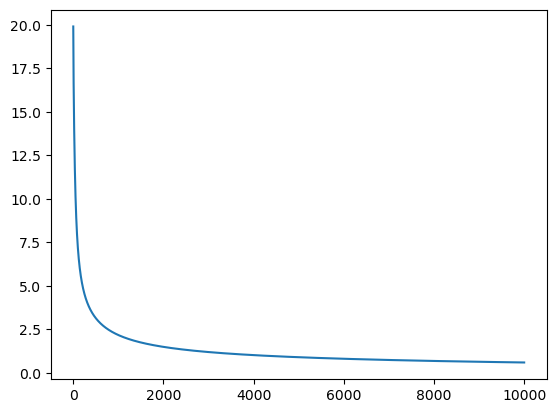

In [180]:
plt.plot(losses)

In [163]:
def generate_data(n_points):
    # Generate random points in unit square
    X = np.random.uniform(0, 1, size=(n_points, 2))
    
    # Create labels based on x1 > x2 condition
    y = np.where(X[:, 0] > X[:, 1], 1, -1)
    
    return X, y

X_test, y_test = generate_data(100)

np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

Shape check:
y_test shape: (100,)
y_pred shape: (100,)

Test Set Performance Metrics:
Accuracy: 0.9700
Precision: 0.9516
Recall: 1.0000
F1 Score: 0.9752

Confusion Matrix:
[[38  3]
 [ 0 59]]


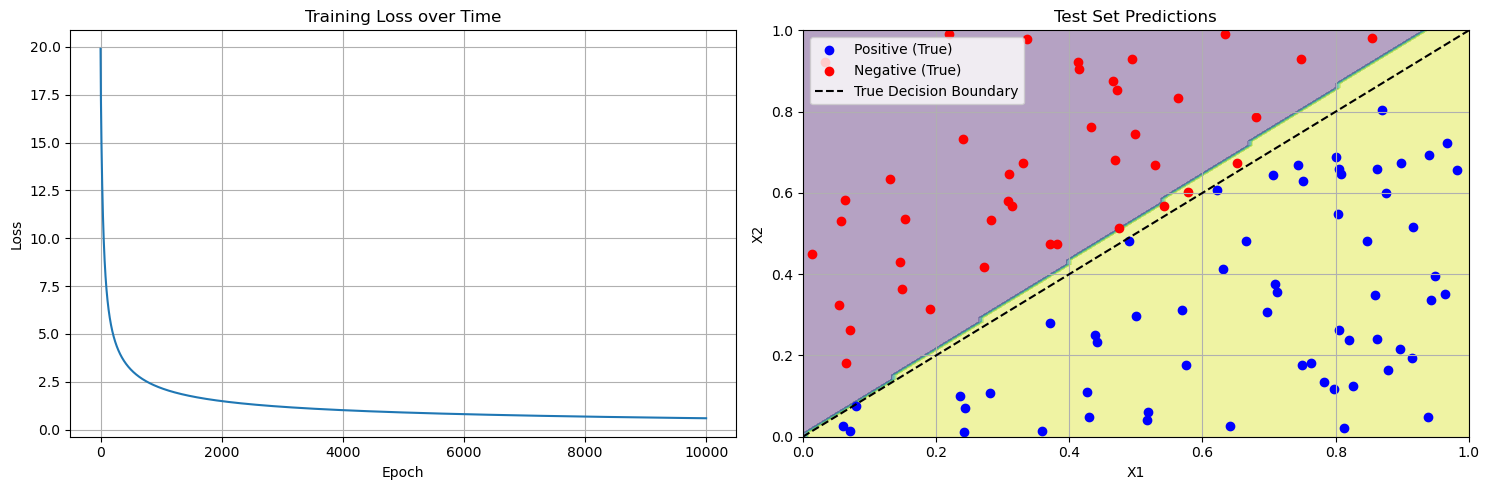

In [208]:
z1_test = np.dot(w, X_test.T)  # Using your trained weights
a1_test = tanh(z1_test)
y_pred = np.where(a1_test > 0, 1, -1).flatten()  # Flatten to match y_test shape

# Ensure shapes match
print("Shape check:")
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("\nTest Set Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize results
plt.figure(figsize=(15, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.grid(True)

# Plot decision boundary
plt.subplot(1, 2, 2)
x_min, x_max = 0, 1
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = np.c_[xx.ravel(), yy.ravel()]
Z_pred = np.where(tanh(np.dot(w, Z.T)) > 0, 1, -1).flatten()
Z_pred = Z_pred.reshape(xx.shape)

plt.contourf(xx, yy, Z_pred, alpha=0.4)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], 
            c='blue', label='Positive (True)')
plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1], 
            c='red', label='Negative (True)')
plt.plot([0, 1], [0, 1], 'k--', label='True Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Test Set Predictions')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [100, 10000]